# Exercise: Build decision tree model to predict survival based on certain parameters

<img src="titanic.jpg" height=200 width=400/>

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

## Calculate score of your model

# Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
columns_to_ignore = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

In [7]:
df.drop(columns_to_ignore, axis='columns', inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [10]:
inputs = df.drop('Survived', axis='columns')
target = df['Survived']

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [12]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Enconding the dataset

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le_Sex = LabelEncoder()

In [15]:
inputs['sex_n'] = le_Sex.fit_transform(inputs['Sex'])

In [16]:
inputs.head()

,Pclass,Sex,Age,Fare,sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [18]:
inputs_n = inputs.drop(['Sex'], axis='columns')

In [20]:
inputs_n = inputs_n.rename(columns={'sex_n':'Sex'})
inputs_n.head()

,Pclass,Age,Fare,Sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


# Checking for NaN in dataset

In [24]:
inputs_n.isnull().sum()

Pclass      0
Age       177
Fare        0
Sex         0
dtype: int64

In [26]:
inputs_n.Age = inputs_n.Age.fillna(inputs_n.Age.mean())
inputs_n.isnull().sum()

Pclass    0
Age       0
Fare      0
Sex       0
dtype: int64

In [27]:
target.isnull().sum()

0

# Dividing the Dataset into Train and Test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2)

# Creating the Model

In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
model.score(X_test, y_test)

0.8212290502793296

# Confusion Matrix

In [36]:
y_predicted = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[92, 13],
       [19, 55]], dtype=int64)

Text(111.5, 0.5, 'Truth')

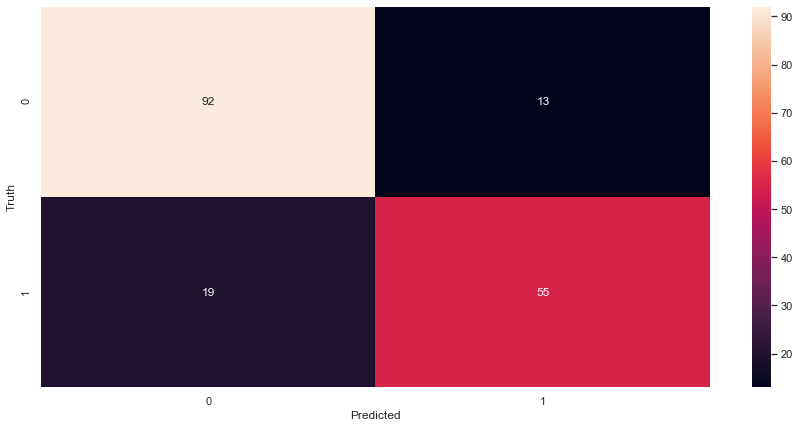

In [38]:
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')